In [1]:
import pandas as pd
from dp_transformer import DifferentialPrivacyTransformer
import numpy as np
import pandas as pd
from dp_mechanisms.quantitative import (
    duchi_mechanism,
    piecewise_mechanism,
    normalize_to_range,
    denormalize_from_range,
    laplace_mechanism,
    multidimensional_duchi_mechanism,
    multidimensional_mechanism
)
from dp_mechanisms.categorical import direct_encoding, optimized_unary_encoding, rappor
from dp_plotting import plot_mean_vs_privatized, plot_histograms
import torch

For this example, we will show how to apply the numerical methods of Local differential privacy. We implement 5 methods of Local Diferential privacy, the first method takes the clasic laplace method, 2. Piecewise Mechanism, duchi, multidimensional duchi, and the algorithm of the paper. In this notebook we will see all the methods aplied to a numerical vector and compare the distribution given the epsilon

Here we just import the libraries necesaries for the use of the class


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error


#file_path = r"C:\Users\David\Universidad de los andes\David Stiven Romero Grajales - Trabajo de Grado\Trabajo de Grado 1\Base de datos y descripción\Entrenamiento_cronicas_N.csv"
#df_final = pd.read_csv(file_path)

#Mac_David
file_path = '/Users/davidmoreno/Library/CloudStorage/OneDrive-SharedLibraries-Universidaddelosandes/David Stiven Romero Grajales - Trabajo de Grado/Trabajo de Grado 1/Base de datos y descripción/Titanic/Titanic-Dataset.csv'

titanic_data = pd.read_csv(file_path)


titanic_data = titanic_data.dropna()



In [18]:
age_data = titanic_data['Age'].dropna()

Lets see the original Plot of the data

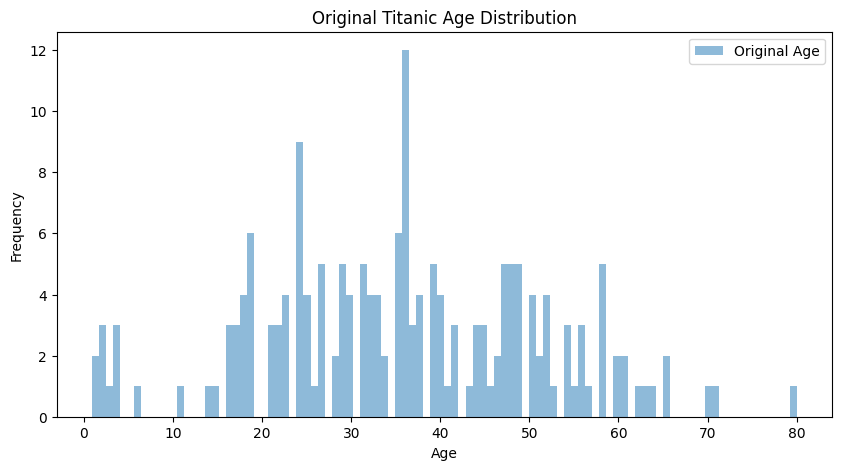

In [19]:
# Plot original Age data
plt.figure(figsize=(10, 5))
plt.hist(age_data, bins=100, alpha=0.5, label='Original Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Original Titanic Age Distribution')
plt.legend()
plt.show()

All of this algorithms need a transformation before the data wee need to have the data in the range [-1,1] so first we need to use this function

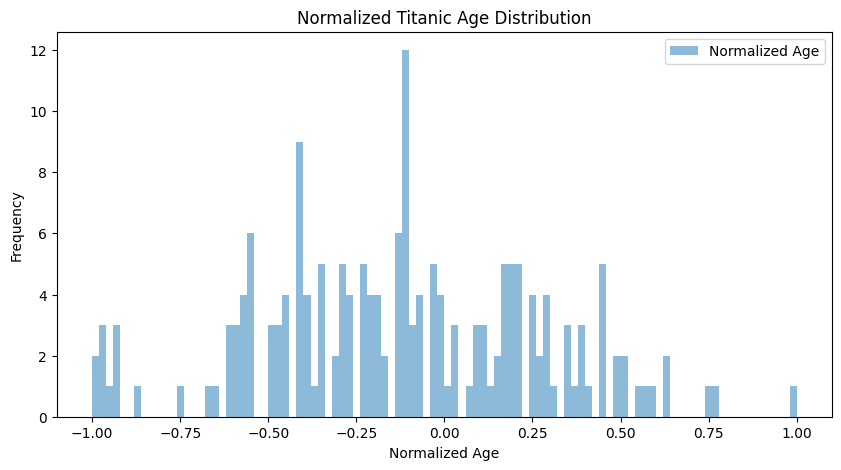

In [30]:
age_tensor = torch.tensor(age_data.values, dtype=torch.float32)
age_normalized, min_age, max_age = normalize_to_range(age_tensor)

#plor the age_normalized
plt.figure(figsize=(10, 5))
plt.hist(age_normalized.numpy(), bins=100, alpha=0.5, label='Normalized Age')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')
plt.title('Normalized Titanic Age Distribution')
plt.legend()
plt.show()


First we will want to see the Duchi Mechanism

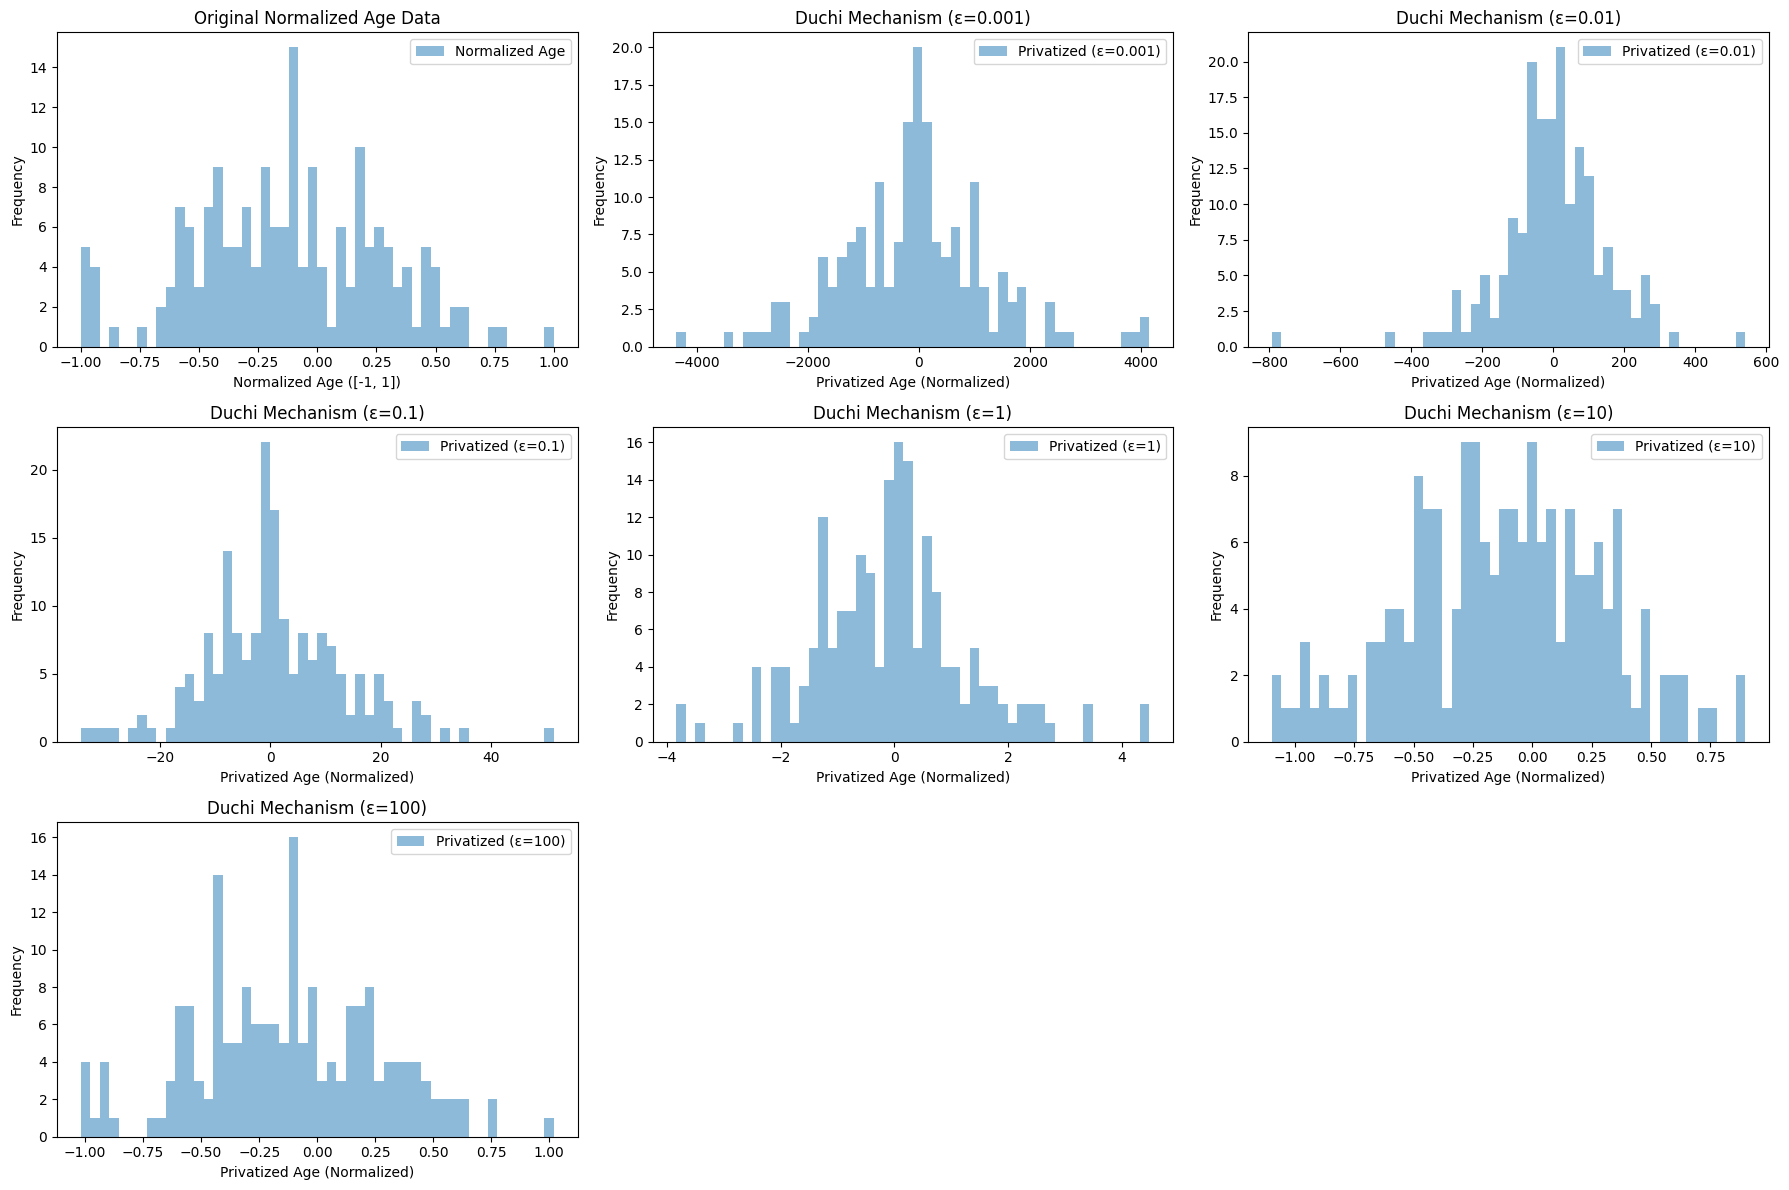

In [33]:
# Set different epsilon values to observe the effect
epsilon_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Plotting
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)
plt.hist(age_normalized.numpy(), bins=50, alpha=0.5, label='Normalized Age')
plt.xlabel('Normalized Age ([-1, 1])')
plt.ylabel('Frequency')
plt.title('Original Normalized Age Data')
plt.legend()

# Apply Duchi Mechanism for each epsilon and plot
for i, epsilon in enumerate(epsilon_values, start=2):
    duchi_priv = laplace_mechanism(age_normalized, epsilon)
    plt.subplot(3, 3, i)
    plt.hist(duchi_priv.numpy(), bins=50, alpha=0.5, label=f'Privatized (ε={epsilon})')
    plt.xlabel('Privatized Age (Normalized)')
    plt.ylabel('Frequency')
    plt.title(f'Duchi Mechanism (ε={epsilon})')
    plt.legend()

plt.tight_layout()
plt.show()

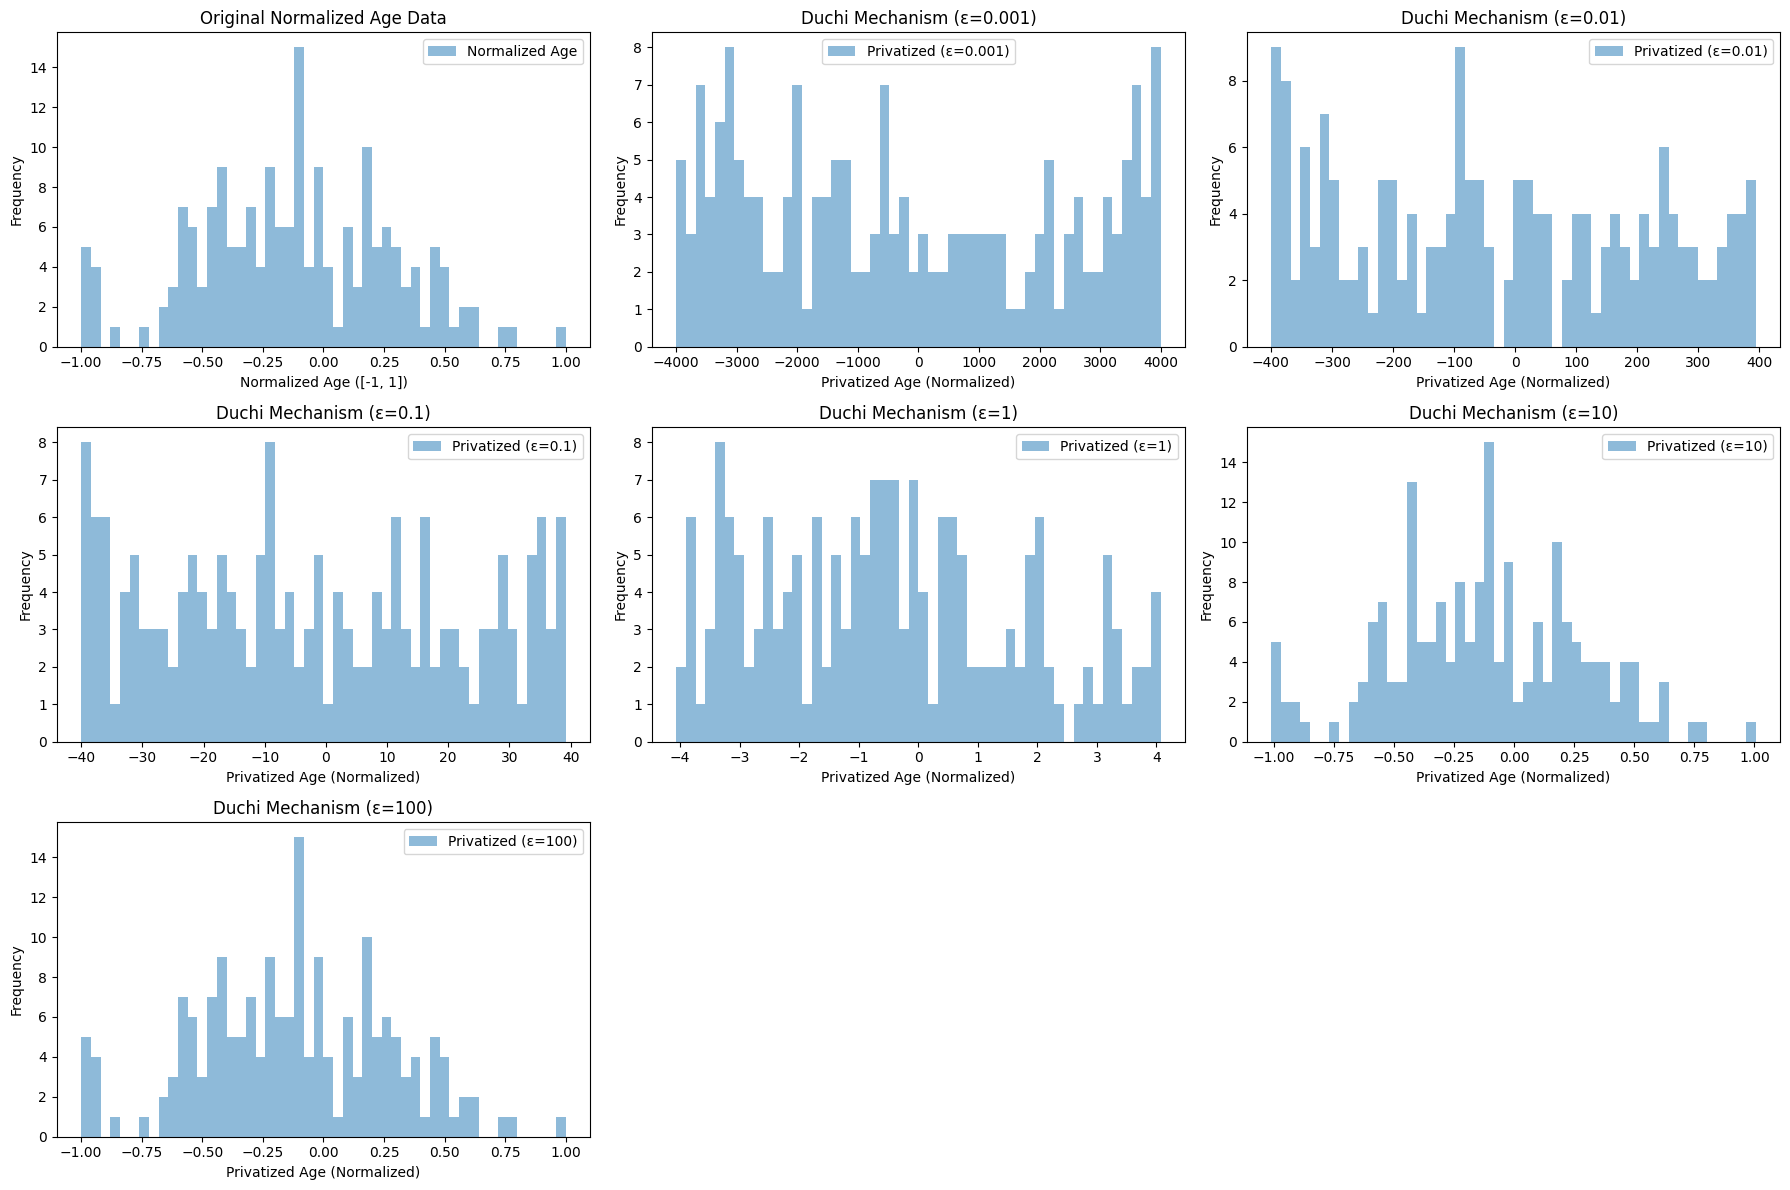

In [35]:
# Set different epsilon values to observe the effect
epsilon_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Plotting
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 1)
plt.hist(age_normalized.numpy(), bins=50, alpha=0.5, label='Normalized Age')
plt.xlabel('Normalized Age ([-1, 1])')
plt.ylabel('Frequency')
plt.title('Original Normalized Age Data')
plt.legend()

# Apply Duchi Mechanism for each epsilon and plot
for i, epsilon in enumerate(epsilon_values, start=2):
    duchi_priv = piecewise_mechanism(age_normalized, epsilon)
    plt.subplot(3, 3, i)
    plt.hist(duchi_priv.numpy(), bins=50, alpha=0.5, label=f'Privatized (ε={epsilon})')
    plt.xlabel('Privatized Age (Normalized)')
    plt.ylabel('Frequency')
    plt.title(f'Duchi Mechanism (ε={epsilon})')
    plt.legend()

plt.tight_layout()
plt.show()